## Bay Wheels Data Exploration
### By Afnan Alshehri

### Table of Contents
* [Introduction](#intro)
* [Data Wrangling](#war)
* [Univariate Exploration](#uni)
* [Bivariate Exploration](#bi)
* [Multivariate Exploration](#multi)
* [Sources](#so)

<a id='intro'></a>
## Introduction

This dataset is the Bay Wheels (previously known as Ford GoBike) Dataset that includes information about individual rides make in a bike sharing system covering the greater San Francisco. In this investigation, I wanted to find characteristics and common behaviors between the users.

<a id='war'></a>
## Data Wrangling

## step #1: Assessment:

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns; sns.set()
import matplotlib.style
import matplotlib as mpl

%matplotlib inline


plt.style.use('fast')
mpl.rcParams['figure.figsize'] = [8.0, 6.0]
mpl.rcParams['figure.dpi'] = 80
mpl.rcParams['savefig.dpi'] = 100

mpl.rcParams['font.size'] = 12
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'medium'

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
# high-level overview of data shape and composition
print(df.shape)
print(df.dtypes)
df.tail(10)

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
183402,122,2019-02-01 00:17:32.2580,2019-02-01 00:19:34.9380,119.0,18th St at Noe St,37.761047,-122.432642,120.0,Mission Dolores Park,37.761420,-122.426435,4326,Subscriber,NaN,NaN,No
183403,249,2019-02-01 00:15:12.0670,2019-02-01 00:19:21.6990,256.0,Hearst Ave at Euclid Ave,37.875112,-122.260553,247.0,Fulton St at Bancroft Way,37.867789,-122.265896,4642,Subscriber,2000.0,Male,No
183404,256,2019-02-01 00:12:50.5540,2019-02-01 00:17:07.3620,241.0,Ashby BART Station,37.852477,-122.270213,248.0,Telegraph Ave at Ashby Ave,37.855956,-122.259795,4845,Subscriber,1980.0,Male,Yes
183405,111,2019-02-01 00:14:49.8740,2019-02-01 00:16:41.3010,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,19.0,Post St at Kearny St,37.788975,-122.403452,4832,Subscriber,1984.0,Male,No
183406,706,2019-02-01 00:04:40.6160,2019-02-01 00:16:27.0800,138.0,Jersey St at Church St,37.750900,-122.427411,78.0,Folsom St at 9th St,37.773717,-122.411647,5017,Subscriber,1988.0,Male,No
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No
183411,271,2019-02-01 00:00:20.6360,2019-02-01 00:04:52.0580,24.0,Spear St at Folsom St,37.789677,-122.390428,37.0,2nd St at Folsom St,37.785000,-122.395936,1057,Subscriber,1989.0,Male,No


In [4]:
# check the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
# descriptive statistics for numeric variables
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


Assessment:
* dtypes:
  * start_time as datetime or int
  * end_time as datetime or int
  * start_station_id as String object
  * end_station_id as String object
  * bike_id as string
  * user_type as categorical
  * member_birth_year as datetime or maybe int.
* null values:
  * member_birth_year
  * member_gender

## step #2: Cleaning:

In [6]:
# creating a new dataFrame to clean
df_clean = df.copy()

In [7]:
# checking for wrong data types and missing values
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [8]:
# checking for null values
df_clean.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [9]:
# drop null values
df_clean.dropna(inplace=True)
df_clean[df_clean.member_gender.isnull()]
df_clean.member_gender.unique()

array(['Male', 'Other', 'Female'], dtype=object)

In [10]:
# checking for null values
df_clean.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [11]:
# check for missing values
df_clean.sample(15).T

,61205,37213,179037,130522,47381,177580,2350,67195,133795,76417,64060,88195,160541,172243,38615
duration_sec,757,576,662,519,432,668,713,479,842,622,493,324,476,151,441
start_time,2019-02-20 17:49:47.9810,2019-02-23 14:34:49.0060,2019-02-01 15:35:07.6220,2019-02-09 17:03:23.0570,2019-02-22 08:50:39.7830,2019-02-01 20:15:57.5500,2019-02-28 18:05:57.1690,2019-02-20 08:10:40.2290,2019-02-08 18:14:56.8230,2019-02-19 08:18:57.6590,2019-02-20 13:06:03.9080,2019-02-16 19:40:06.2150,2019-02-05 16:56:28.6640,2019-02-03 16:51:25.6410,2019-02-23 11:37:55.2650
end_time,2019-02-20 18:02:25.7580,2019-02-23 14:44:25.5020,2019-02-01 15:46:09.7680,2019-02-09 17:12:02.7580,2019-02-22 08:57:52.1990,2019-02-01 20:27:06.1970,2019-02-28 18:17:50.5990,2019-02-20 08:18:39.5060,2019-02-08 18:28:59.3030,2019-02-19 08:29:19.7270,2019-02-20 13:14:17.6720,2019-02-16 19:45:30.7940,2019-02-05 17:04:25.3800,2019-02-03 16:53:56.7800,2019-02-23 11:45:17.2400
start_station_id,241,53,343,197,36,33,92,67,75,49,202,246,43,131,371
start_station_name,Ashby BART Station,Grove St at Divisadero,Bryant St at 2nd St,El Embarcadero at Grand Ave,Folsom St at 3rd St,Golden Gate Ave at Hyde St,Mission Bay Kids Park,San Francisco Caltrain Station 2 (Townsend St...,Market St at Franklin St,S Park St at 3rd St,Washington St at 8th St,Berkeley Civic Center,San Francisco Public Library (Grove St at Hyde...,22nd St at Dolores St,Lombard St at Columbus Ave
start_station_latitude,37.8525,37.7759,37.7832,37.8088,37.7838,37.7816,37.7723,37.7766,37.7738,37.7808,37.8008,37.8691,37.7788,37.755,37.8027
start_station_longitude,-122.27,-122.438,-122.394,-122.25,-122.399,-122.415,-122.393,-122.396,-122.421,-122.395,-122.275,-122.271,-122.416,-122.426,-122.414
end_station_id,265,98,370,180,15,104,44,61,377,114,7,251,21,134,6
end_station_name,Ninth St at Parker St,Valencia St at 16th St,Jones St at Post St,Telegraph Ave at 23rd St,San Francisco Ferry Building (Harry Bridges Pl...,4th St at 16th St,Civic Center/UN Plaza BART Station (Market St ...,Howard St at 8th St,Fell St at Stanyan St,Rhode Island St at 17th St,Frank H Ogawa Plaza,California St at University Ave,Montgomery St BART Station (Market St at 2nd St),Valencia St at 24th St,The Embarcadero at Sansome St
end_station_latitude,37.8589,37.7651,37.7873,37.8127,37.7954,37.767,37.7811,37.7765,37.7719,37.7645,37.8046,37.8706,37.7896,37.7524,37.8048


In [12]:
# fixing columns that have wrong data types
df_clean['start_time'] = df_clean['start_time'].astype('datetime64[ns]')
df_clean['end_time'] = df_clean['end_time'].astype('datetime64[ns]')
df_clean['start_station_id'] = df_clean['start_station_id'].astype(str)
df_clean['end_station_id'] = df_clean['end_station_id'].astype(str)
df_clean['bike_id'] = df_clean['bike_id'].astype(str)
df_clean['user_type'] = df_clean['user_type'].astype('category')

In [13]:
# checking the data types
print(df.dtypes)

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


In [14]:
# checking for negative duration 
df_clean[df_clean['duration_sec'] < 0]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip


* There is no negative duration time

In [15]:
# checking for duplicated values
(sum(df_clean.duplicated()))

0

* There is no duplicated values

In [16]:
# checking for the birth year outliers
df_clean.member_birth_year.describe()


count    174952.000000
mean       1984.803135
std          10.118731
min        1878.000000
25%        1980.000000
50%        1987.000000
75%        1992.000000
max        2001.000000
Name: member_birth_year, dtype: float64

C:\Users\96654\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\96654\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


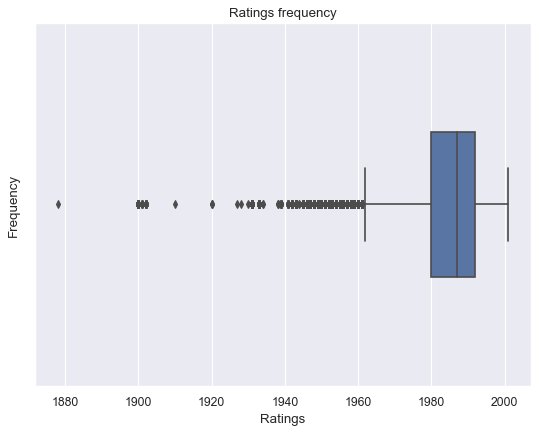

In [17]:
# checking for birth year outliers
data = df_clean.member_birth_year

ax = sns.boxplot(data, orient='v', width=.4)
ax.set(xlabel='Ratings', ylabel='Frequency', title='Ratings frequency')
plt.show()

In [18]:
# count of the outliers (birth year less than 1940) people over 79 years old.
outliers_df = df_clean[df_clean.member_birth_year < 1940][['bike_id', 'member_birth_year']]
outliers_df.count()

bike_id              203
member_birth_year    203
dtype: int64

* Age seems to be unrealstic, there are more than 203 records with age greater than 79 years old. Most of whcih are subscriber so deleting these rows could affect other aspect in comapring the user_types and trip duration in Bivariate and Multivariate steps.

### Feature Engineering
Since the start_time & end_time column has the year, month, day, and hour we can extract useful information and create new columns to use it in our expolring.

* Year
* Month
* Day
* Hour
* Age: extracted from member_birth_year

In [19]:
# check the cleaned data
df_clean

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.724,2019-02-01 00:12:50.034,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.744,2019-02-01 00:10:48.502,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.549,2019-02-01 00:08:27.220,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.360,2019-02-01 00:07:54.287,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No


In [20]:
# feature engineering
df_clean['trip_month'] = df_clean.start_time.dt.strftime('%b')
df_clean['trip_day'] = df_clean.start_time.dt.strftime('%a')
df_clean['trip_hour'] = df_clean.start_time.dt.strftime('%H')
df_clean['start_seconds'] = df_clean.start_time.dt.strftime('%S')
df_clean['start_microsecond'] = df_clean.start_time.dt.strftime('%f')

In [21]:
# unneeded columns
df_clean.drop(axis=1, columns=['start_time','end_time'], inplace=True)

In [22]:
# final strcture of the dataframe
df_clean.tail()

,duration_sec,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,trip_month,trip_day,trip_hour,start_seconds,start_microsecond
183407,480,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No,Feb,Fri,00,49,724000
183408,313,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No,Feb,Fri,00,34,744000
183409,141,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes,Feb,Fri,00,05,549000
183410,139,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No,Feb,Fri,00,34,360000
183411,271,24.0,Spear St at Folsom St,37.789677,-122.390428,37.0,2nd St at Folsom St,37.785000,-122.395936,1057,Subscriber,1989.0,Male,No,Feb,Fri,00,20,636000


In [23]:
# add the duration time in minutes
df_clean['duration_min'] = df_clean['duration_sec'] / 60

In [24]:
# check the minutes column
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   duration_sec             174952 non-null  int64   
 1   start_station_id         174952 non-null  object  
 2   start_station_name       174952 non-null  object  
 3   start_station_latitude   174952 non-null  float64 
 4   start_station_longitude  174952 non-null  float64 
 5   end_station_id           174952 non-null  object  
 6   end_station_name         174952 non-null  object  
 7   end_station_latitude     174952 non-null  float64 
 8   end_station_longitude    174952 non-null  float64 
 9   bike_id                  174952 non-null  object  
 10  user_type                174952 non-null  category
 11  member_birth_year        174952 non-null  float64 
 12  member_gender            174952 non-null  object  
 13  bike_share_for_all_trip  174952 non-null  ob

### What is the structure of your dataset?
This dataset contains over 183412 observations and 16 columns that represent bike riders. variables including duration_sec	start station start station, member_birth_year, as well as their gender. The users are divided into two groups. 1.Member (Subscriber) and 2.Customer. Also, the trip duration in seconds is an important variable.

### What is/are the main feature(s) of interest in your dataset?
The duration in comparison to different genders and user groups. an inquiry such, "Does a member have a longer duration than a regular customer?" As a result of this, a client may be convinced to become a member.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
The trip's duration, and day will be useful in comparing different groups such as gender, age and user type. 

<a id='uni'></a>
## Univariate Exploration

In this section, I will investigate the distributions of some variables individually.

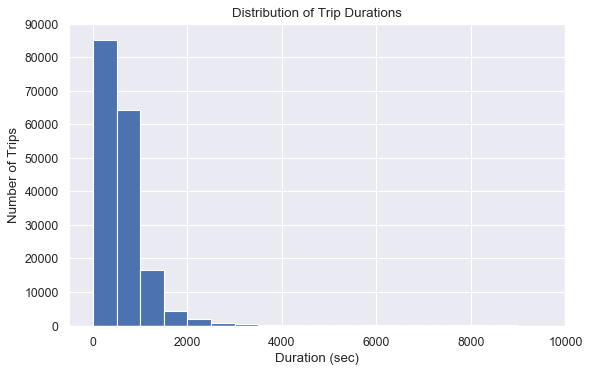

In [25]:
# univariate plot of the duration distribution in ()
binsize = 500
bins = np.arange(0, df_clean['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_clean, x = 'duration_sec', bins = bins)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (sec)')
plt.ylabel('Number of Trips')
plt.axis([-500, 10000, 0, 90000])
plt.show()

We can visualize that the the above plot is right-screwed, with a long tail on the right. The next step is to apply a logarithmic transformation to x-axis.

C:\Users\96654\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  if sys.path[0] == '':


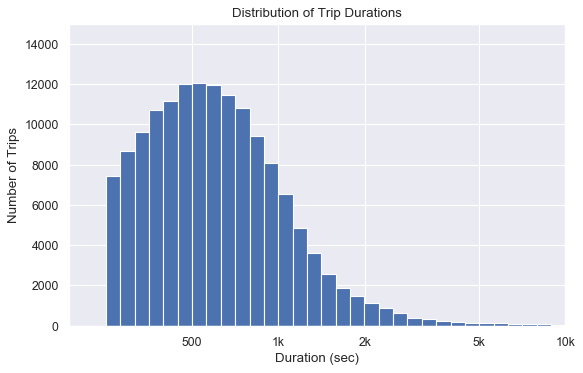

In [26]:
# univariate plot of the log scale of the duration
log_binsize = 0.05
log_bins = 10 ** np.arange(2.4, np.log10(df_clean['duration_sec'].max()) + log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_clean, x = 'duration_sec', bins = log_bins)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (sec)')
plt.ylabel('Number of Trips')
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4], [500, '1k', '2k', '5k', '10k'])
plt.axis([0, 10000, 0, 15000])
plt.show()

* The majority of the numbers are less than 2000 seconds, with the peak being about 600 seconds. Trip time values initially climb from roughly 8000 at 0 to 12500 at approximately 600, but then begin to decrease and reach below 2000 values around 2000 sec.

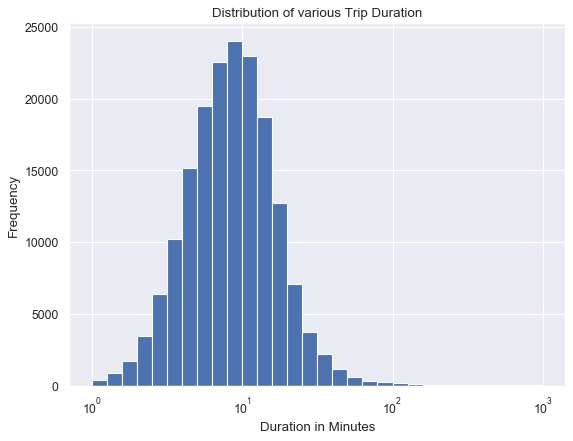

In [27]:
# converting the trip durations from seconds to minutes 

binedges = 10**np.arange(0 , 3+0.1 , 0.1)
ticks =  [ 0.1 , 0.3 , 1 , 3, 10, 30, 100, 300]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = df_clean , x = 'duration_min' , bins = binedges);
plt.xticks(ticks,labels);
plt.title('Distribution of various Trip Duration')
plt.xlabel('Duration in Minutes');
plt.ylabel('Frequency')
plt.xscale('log');

* As we can see from the graph above, the majority of people tend to ride their bikes for short periods of time (around 10 mins).

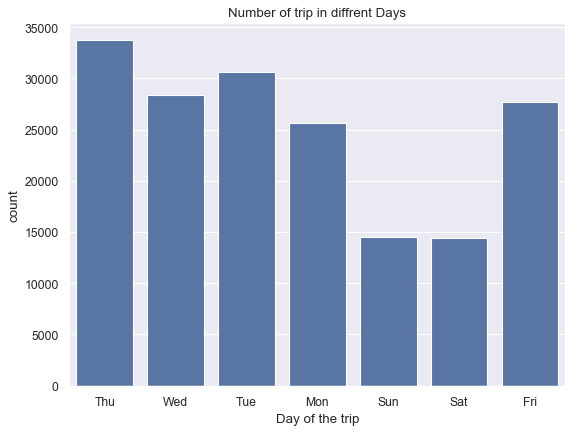

In [28]:
# univariate plot of day of the trip
sb.countplot(data=df_clean, x='trip_day', color=sb.color_palette()[0]);
plt.xlabel('Day of the trip')
plt.title('Number of trip in diffrent Days');

* weekdays has way more trips than the weekends, as expected.

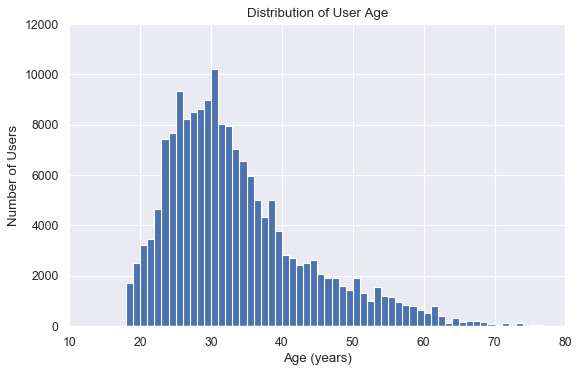

In [29]:
# univariate plot of age distribution derived from member's birth year.
binsize = 1
bins = np.arange(0, df_clean['member_birth_year'].astype(float).max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_clean.dropna(), x = 'member_birth_year', bins = bins)
plt.axis([1939, 2009, 0, 12000])
plt.xticks([1939, 1949, 1959, 1969, 1979, 1989, 1999, 2009], [(2019-1939), (2019-1949), (2019-1959), (2019-1969), (2019-1979), (2019-1989), (2019-1999), (2019-2009)])
plt.gca().invert_xaxis()
plt.title('Distribution of User Age')
plt.xlabel('Age (years)')
plt.ylabel('Number of Users')
plt.show()

* We can see that the distribution is more concentrated between 20 to 40 years old.

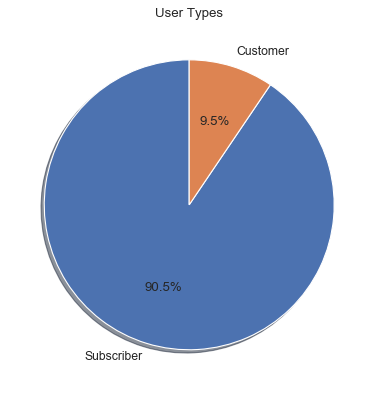

In [30]:
# univariate plot of type of users
data = df_clean['user_type'].value_counts()/df_clean['user_type'].value_counts().sum()
plt.pie(data, labels = data.index, autopct='%1.1f%%', shadow = 'True' , startangle = 90)
plt.title('User Types');

* The majority of users are subscribers with 90.5% and only 9.5% are customer.

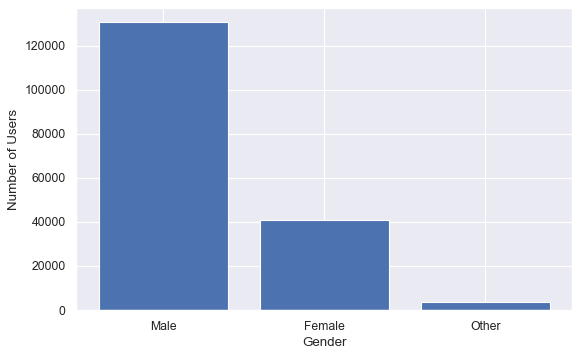

In [31]:
# univariate plot of genders on bar.
plt.figure(figsize=[8,5])
plt.bar(x = df_clean.member_gender.value_counts().keys(), height = df_clean.member_gender.value_counts() )
plt.xlabel('Gender')
plt.ylabel('Number of Users')
plt.show()


* The majority of users are men.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
* The trip length has a large number of values and is concentrated to a tail, the log transform was performed and discovered that the peak occurs at 600 seconds starting from 0 and then the distribution begins to dip and does not recoup any more peak value.
* The majority of users are subscribers with 90.5% and only 9.5% are customer.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
* The age is determined by subtracting the birth year from the year  2019 (the year of the data), resulting in distribution for age, and it was used since age helps to explain trip duration dependency.

<a id='bi'></a>
## Bivariate Exploration

In the previous section, we looked at the univariate distribution of five features in the Ford GoBike System dataset: duration time , day of the trip, age, user type, and gender. 
Now, we'll investigate relationships between pairs of these variables, particularly how each of them relates to duration time.

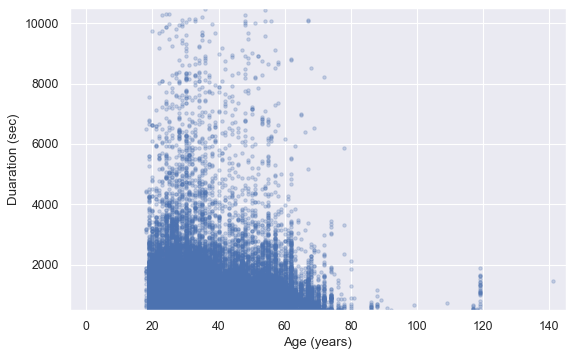

In [32]:
# bivariate plot of trip duration vs. age
plt.figure(figsize=[8,5])
plt.scatter((2019 - df_clean['member_birth_year']), df_clean['duration_sec'], alpha = 0.25, marker = '.' )
plt.axis([-5, 145, 500, 10500])
plt.xlabel('Age (years)')
plt.ylabel('Duaration (sec)')
plt.show()


* As most of the durations are below 6000 and age is below 80, we will crop the plot around the same those values.

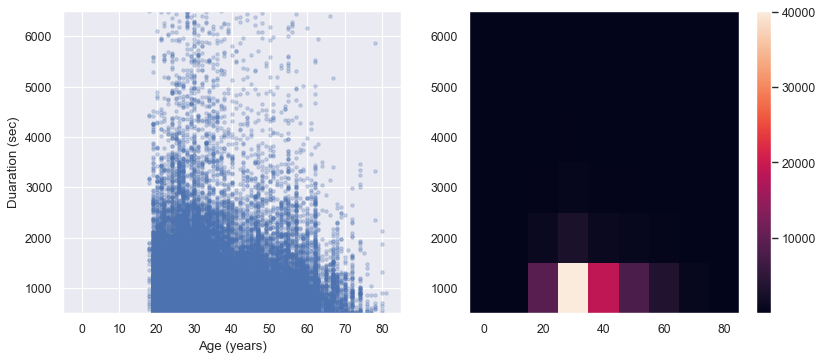

In [33]:
# bivariate plots of trip duration vs. age (cropped)
plt.figure(figsize=[12,5])

plt.subplot(1, 2, 1)
plt.scatter((2019 - df_clean['member_birth_year']), df_clean['duration_sec'], alpha = 0.25, marker = '.' )
plt.axis([-5, 85, 500, 6500])
plt.xlabel('Age (years)')
plt.ylabel('Duaration (sec)')

plt.subplot(1, 2, 2)
bins_y = np.arange(500, 6500+1, 1000)
bins_x = np.arange(-5, 85+1, 10)
plt.hist2d((2019 - df_clean['member_birth_year']), df_clean['duration_sec'],
           bins = [bins_x, bins_y])
plt.colorbar(ticks=[10000, 20000, 30000, 40000]);
plt.show()


* Based on the above plots, we can conclude that the majority of bike users are between the ages of 20 and 45. Younger members tend to take longer durations.

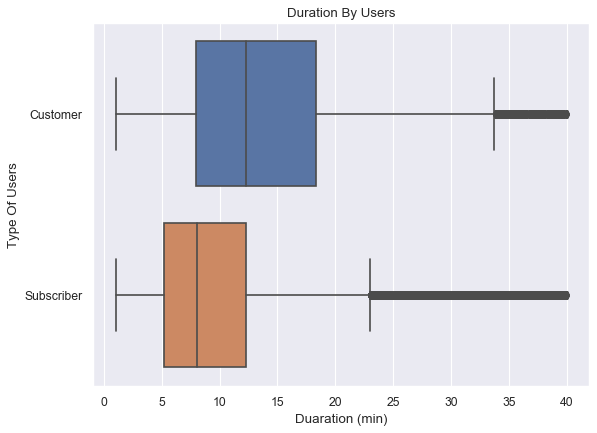

In [52]:
# distribution of the duration by users

majority = df_clean[df_clean['duration_min'] < 40]
sns.boxplot(data =majority , y='user_type', x='duration_min')
plt.title('Duration By Users')
plt.xlabel('Duaration (min)')
plt.ylabel('Type Of Users');

* Here we can see that higher percentage of customers are taking longer trips then compared to subscribers.

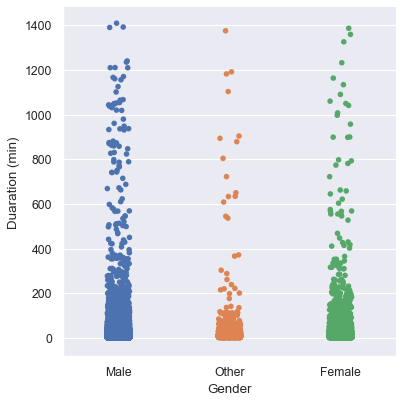

In [49]:
# bivariate plots of trip duration vs. gender

sb.catplot(x="member_gender", y="duration_min", data=df_clean)
plt.xlabel('Gender')
plt.ylabel('Duaration (min)');

* Male seem to the higher trip duration, but this need to be investigated more. (proportion)

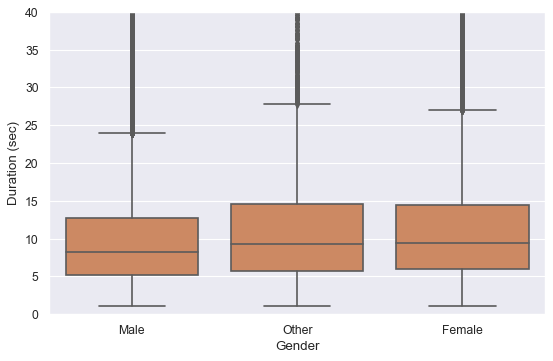

In [47]:
# bivariate plots of trip duration vs. gender (proportion)

plt.figure(figsize = [8, 5])
base_color = sb.color_palette()[1]
sb.boxplot(data = df_clean, x = 'member_gender', y = 'duration_min', color = base_color)
plt.ylim([0, 40])
plt.xlabel('Gender')
plt.ylabel('Duration (min)')
plt.show()

* Although, the number of male riders is much higher than the number of other and female riders, we can observe that a higher proportion of female riders and other riders travel longer distances than males.

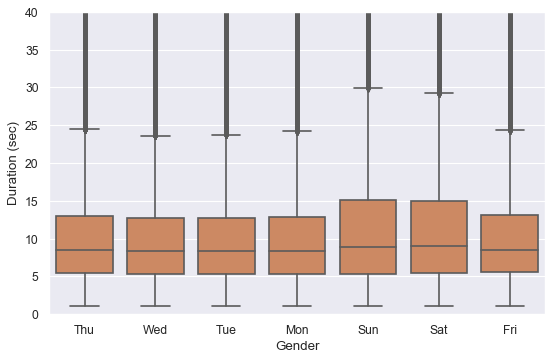

In [37]:
# bivariate plots of trip duration vs. trip day (proportion)

plt.figure(figsize = [8, 5])
base_color = sb.color_palette()[1]
sb.boxplot(data = df_clean, x = 'trip_day', y = 'duration_min', color = base_color)
plt.ylim([0, 40])
plt.xlabel('Gender')
plt.ylabel('Duration (min)')
plt.show()

* The weekends have longer durations compared to weekdays (about 5 minutes longer) although the weekends have less trips.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
* Trip duration is highly dependent on the age of the user. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
* The categorical variables with larger values, such as user type and gender, (hypothetically) would have longer trip durations, but the opposite is true. For example, the number of male members is quite high, but the percentage of female members who take longer journeys is higher.
* The weekends have longer durations compaired to weekdays about 5 minits longer.

<a id='multi'></a>
## Multivariate Exploration

The main thing I want to explore in this part of the analysis is how the two categorical measures gender and user type play into the relationship between trip duration and age.

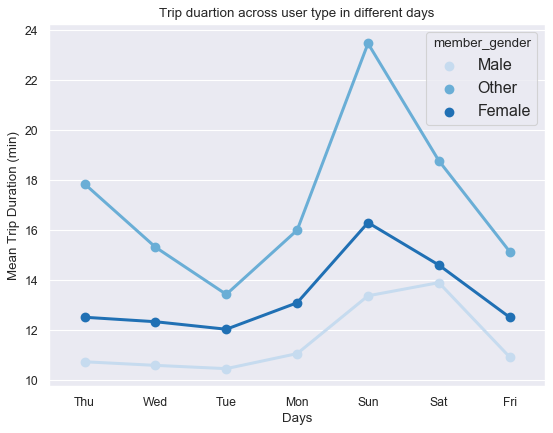

In [38]:
# multivariate plot of duration, days, and gender

fig = plt.figure(figsize = [8,6])
sb.pointplot(data = df_clean, x = 'trip_day', y = 'duration_min', hue = 'member_gender', palette = 'Blues', ci=None)
plt.title('Trip duartion across user type in different days')
plt.ylabel('Mean Trip Duration (min)')
plt.xlabel('Days')
plt.show();


* Trib duration of each day for member gender. Others, in general, tend to have much longer trips around 20 minutes. On the other hand, the male has a shorter duration around 10 minutes on the weekdays.

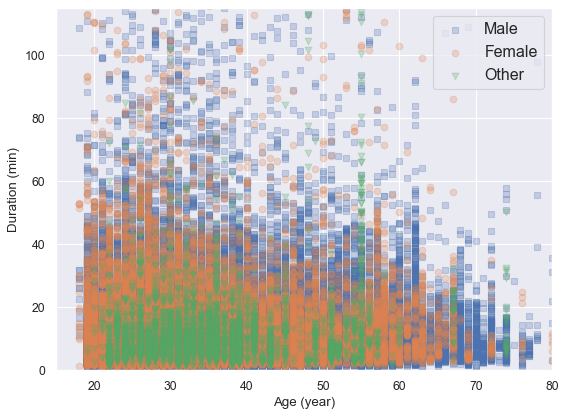

In [39]:
# multivariate plot of duration, age, and gender

gender_markers = [['Male', 's'],['Female', 'o'],['Other', 'v']]

for gender, marker in gender_markers:
    df_gender = df_clean[df_clean['member_gender'] == gender]
    plt.scatter((2019 - df_gender['member_birth_year']), df_gender['duration_min'], marker = marker, alpha=0.25)
plt.legend(['Male','Female','Other'])
plt.axis([15, 80, 0, 115 ])
plt.xlabel('Age (year)')
plt.ylabel('Duration (min)')
plt.show()

* This plot does not show quit a clear picture, lets seperate all three genders into different graphs.

C:\Users\96654\anaconda3\envs\tensorflow\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


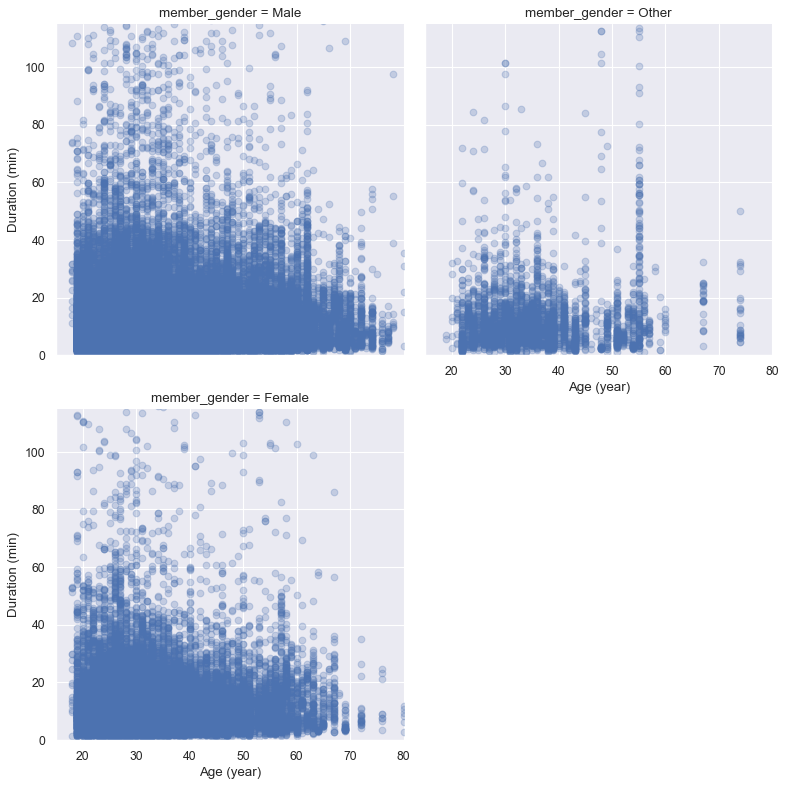

In [40]:
# multivariate plot of duration, age, and gender (seperated)

df_clean['age'] = (2019 - df_clean['member_birth_year'])
genders = sb.FacetGrid(data = df_clean, col = 'member_gender', col_wrap = 2, size = 5,
                 xlim = [15, 80], ylim = [0, 115])
genders.map(plt.scatter, 'age', 'duration_min', alpha=0.25)
genders.set_xlabels('Age (year)')
genders.set_ylabels('Duration (min)')

plt.show()

* Here we are seeing a jump in duration for others at an older age (around 55 years).

C:\Users\96654\anaconda3\envs\tensorflow\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


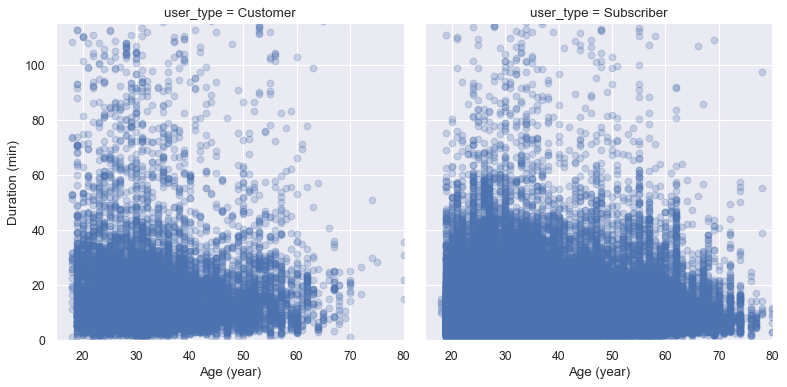

In [41]:
# multivariate plot of duration, age, and user type

user_types = sb.FacetGrid(data = df_clean, col = 'user_type', col_wrap = 2, size = 5,
                 xlim = [15, 80], ylim = [0, 115])
user_types.map(plt.scatter, 'age', 'duration_min', alpha=0.25)
user_types.set_xlabels('Age (year)')
user_types.set_ylabels('Duration (min)')

plt.show()

* Both the Customer and the Subscriber have comparable age and trip duration patterns in this situation. However, there is a minor upward trend in the age of subscribers.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
* We can now see the average travel length of each gender in different days by adding the'member gender' to the equation.

* Also, while the number of longer-distance trips is higher for males, the proportion is greater for women and others; further, other has one more peak for longer-distance trips around the age of 55.

* Both age and trip duration trends are similar for different user groups. However, there is a slight upward trend in age for subscribers with longer trip durations.

### Were there any interesting or surprising interactions between features?
* It's surprising to see a second peak for the other gender as they become older.

In [42]:
df_clean.to_csv('df_clean.csv', index=False)